In [1]:
import numpy as np#linear algebra
import pandas as pd#data preprocessing,CSV files
import pickle#saving and loading trained model
from os import path
#importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import(StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler,OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer
#importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import glob
#path to your folder containing csv files
folder_path="/content/drive/MyDrive/data/raw/"
#get  a list of all csv files in the folder
csv_files=glob.glob(folder_path + "*.csv")
#Read all the csv files and combine them into one dataframe
df_list=(pd.read_csv(file) for file in csv_files)
df=pd.concat(df_list,ignore_index=True)
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
#display the shape and the find the concatinated dataframe
nRow,nCol=df.shape
print(f"Rows:{nRow},Columns: {nCol}")

Rows:2830743,Columns: 79


In [6]:
df.columns=df.columns.str.strip()
df['Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


# Check NULL values column-wise (most common)

In [7]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


# Check if ANY NULL exists (quick check)

In [8]:
df.isnull().values.any()


np.True_

# Check rows that contain NULL values

In [9]:
df[df.isnull().any(axis=1)]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
5106,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5833,49578,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8381,59597,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8552,41699,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14762,43832,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578213,443,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2611794,36812,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2619737,53581,0,1,1,0,0,0,0,0.0,0.0,...,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2620045,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Count total NULL values in dataset

In [10]:
df.isnull().sum().sum()


np.int64(1358)

In [11]:
import numpy as np

num = df.select_dtypes(include=[np.number])

num.isna().sum()          # NaN per numeric column
np.isinf(num).sum()       # Inf per numeric column


,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Active Min,0
Idle Mean,0
Idle Std,0
Idle Max,0


In [12]:
np.isinf(num).sum().sum()


np.int64(4376)

# Check both NaN and Inf together

In [13]:


num = df.select_dtypes(include=[np.number])
nan_count = num.isna().sum().sum()
inf_count = np.isinf(num).sum().sum()

print("NaN:", nan_count, "Inf:", inf_count)


NaN: 1358 Inf: 4376


# handling the NaN and Inf


In [14]:

# Replace Inf with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Fill NaN safely
df = df.fillna(0)


In [15]:
num = df.select_dtypes(include=[np.number])

print("NaN after cleaning:", num.isna().sum().sum())
print("Inf after cleaning:", np.isinf(num).sum().sum())


NaN after cleaning: 0
Inf after cleaning: 0


In [16]:
df.shape

(2830743, 79)

In [17]:
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np               # for numerical operations and dtype checking
%matplotlib inline

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """
    This function plots the distribution of values for multiple columns in a DataFrame.
    Numeric columns are shown as histograms.
    Categorical columns (with few unique values) are shown as bar charts.

    Parameters:
    df: pandas DataFrame
        The dataset containing columns to plot
    n_graph_shown: int
        Maximum number of columns to plot
    n_graph_per_row: int
        Number of plots to show in each row
    """

    # Count unique values in each column
    nunique = df.nunique()

    # Select columns with 2 to 49 unique values for plotting
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    print(columns_to_plot)

    # Create a smaller DataFrame containing only selected columns
    df_to_plot = df[columns_to_plot]

    # Get the number of rows and columns in the filtered DataFrame
    n_rows, n_cols = df_to_plot.shape

    # Calculate how many rows of plots we need in the figure
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # integer division

    # Create the figure with calculated size
    plt.figure(num=None,
               figsize=(6 * n_graph_per_row, 8 * n_graph_row),  # width x height in inches
               dpi=80,                                         # resolution
               facecolor='w',                                  # figure background color
               edgecolor='k')                                  # figure border color

    # Loop through each selected column (up to n_graph_shown)
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        # Create a subplot in the grid
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)

        # Get data of the current column
        column_data = df_to_plot[col_name]

        # Check if the column is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # If numeric, plot histogram
            column_data.hist()
        else:
            # If categorical, count unique values and plot bar chart
            value_counts = column_data.value_counts()
            value_counts.plot.bar()

        # Label y-axis
        plt.ylabel('counts')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title of the subplot using f-string
        plt.title(f'{col_name} (column {i})')

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    # Display the figure
    plt.show()


Index(['Fwd PSH Flags', 'Fwd URG Flags', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'min_seg_size_forward', 'Label'],
      dtype='object')


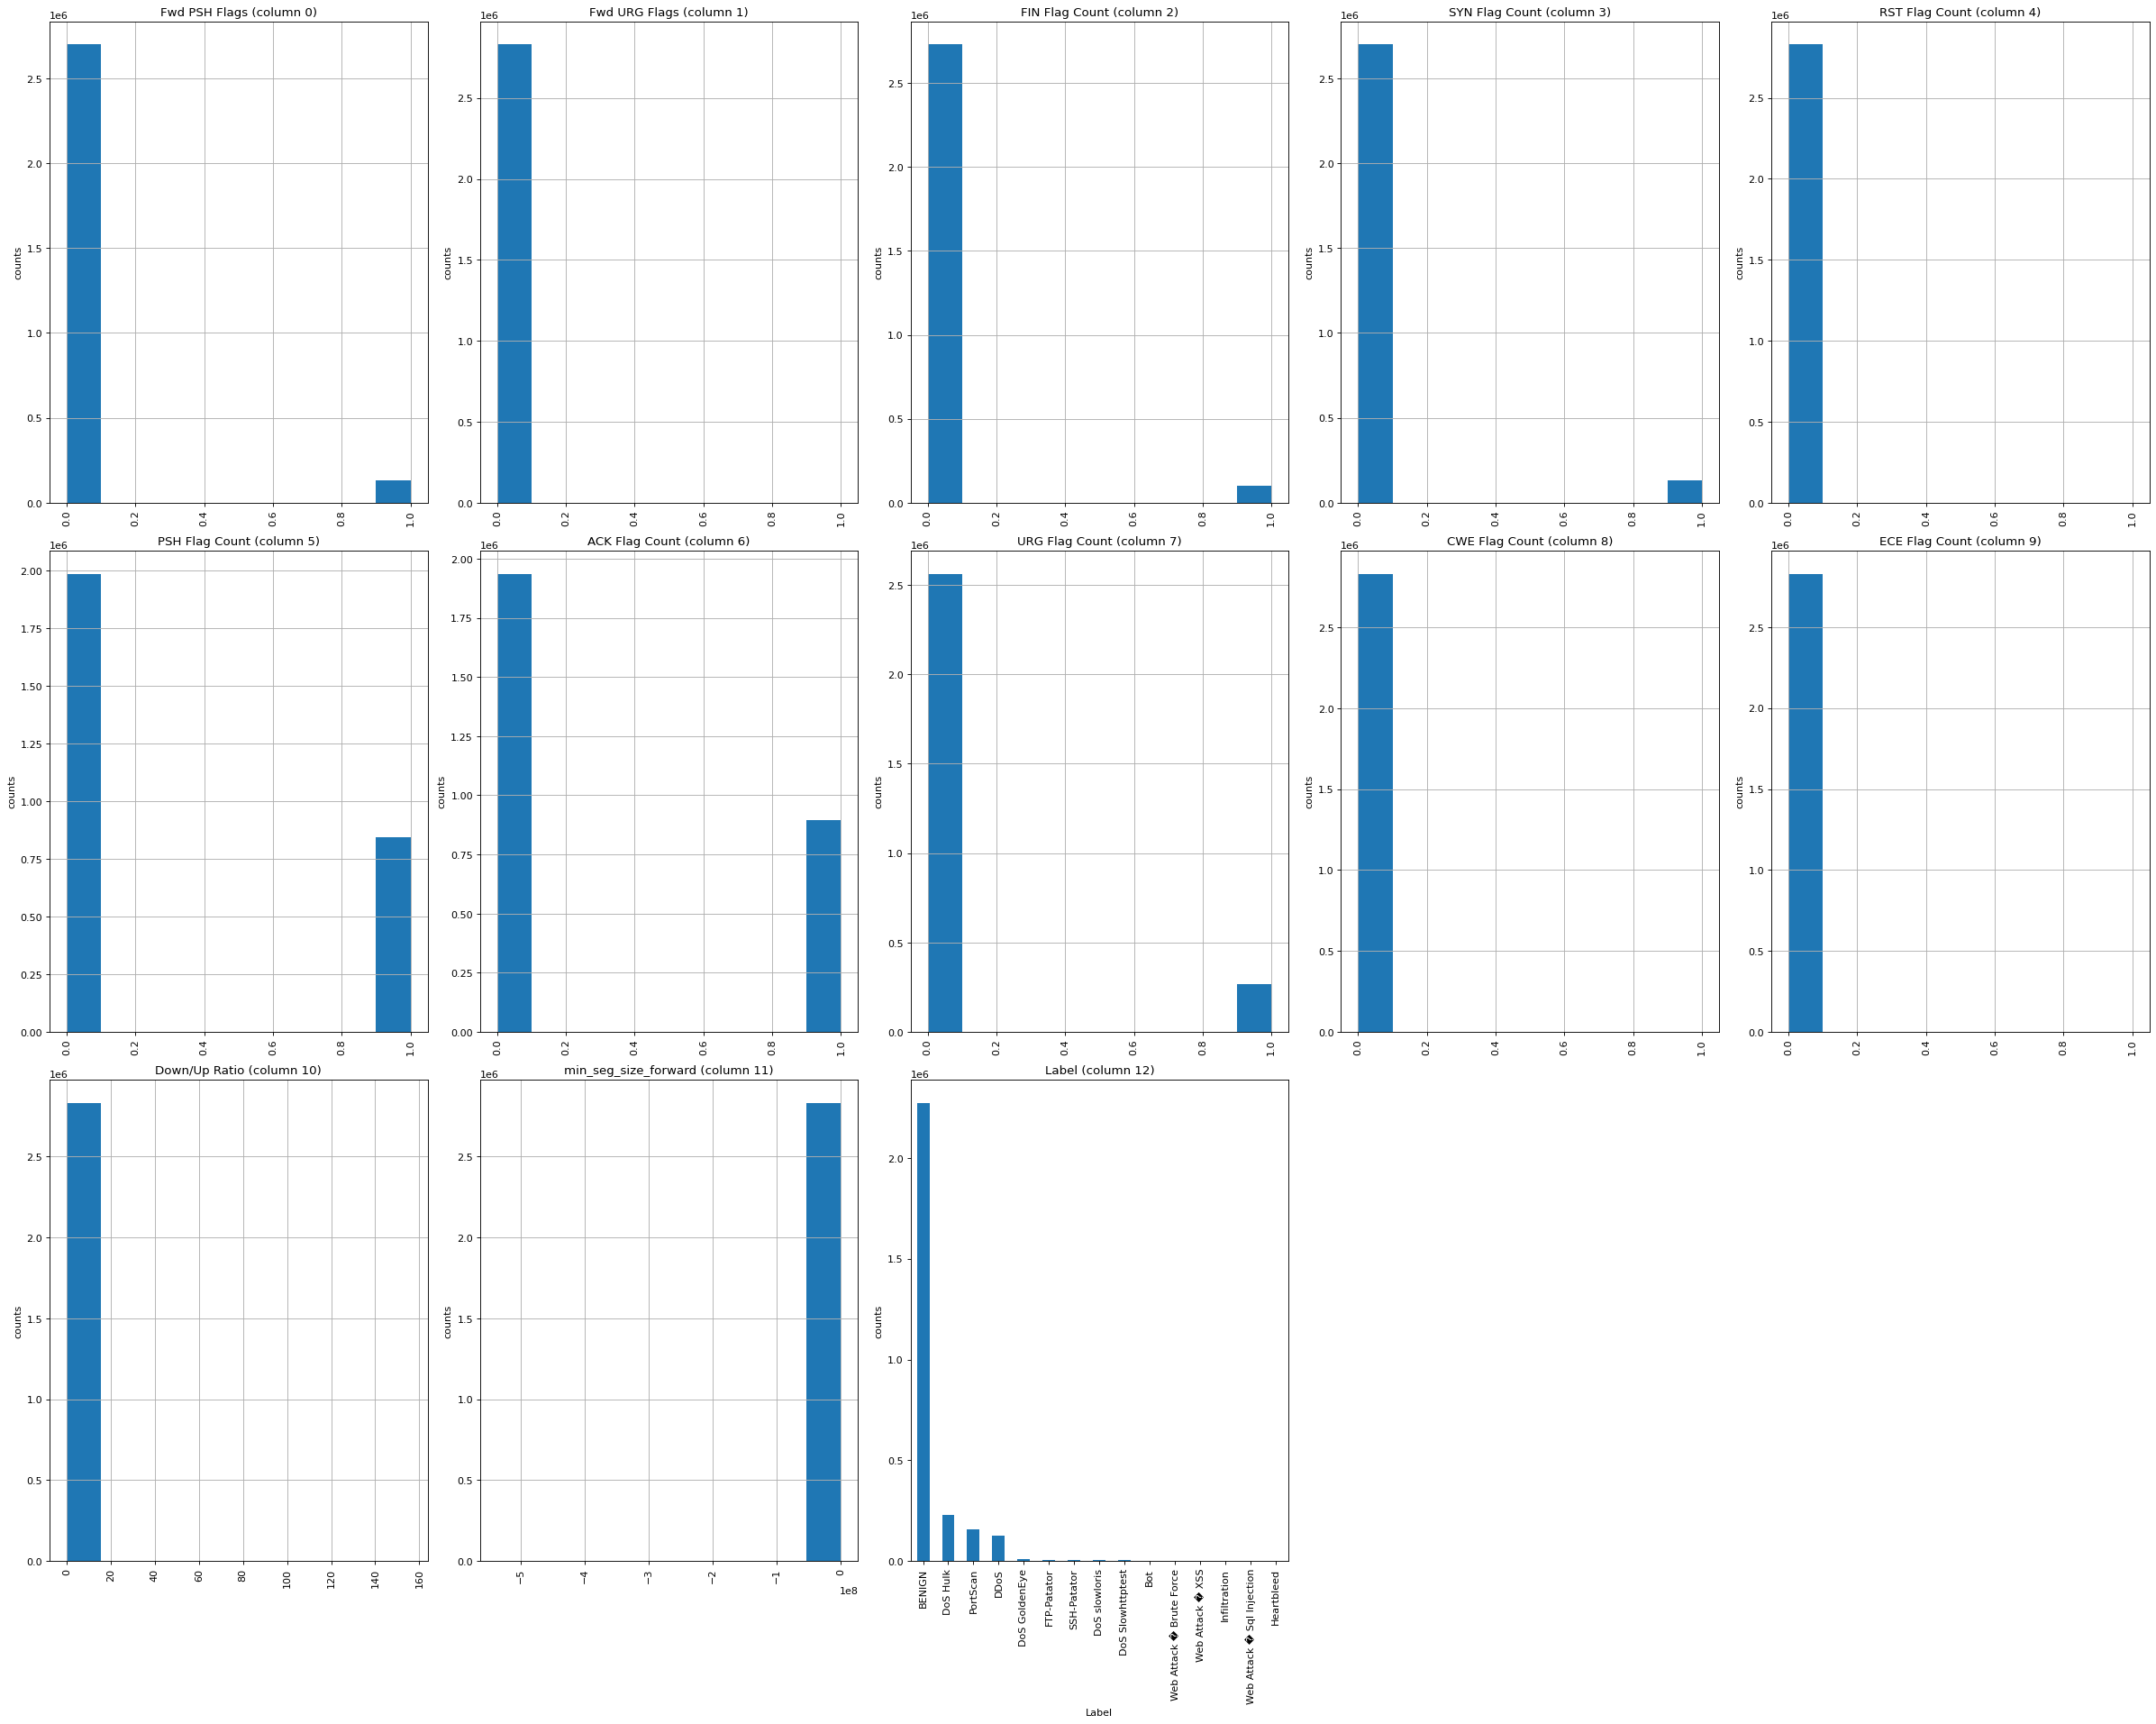

In [18]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df, 79, 5)

In [19]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")



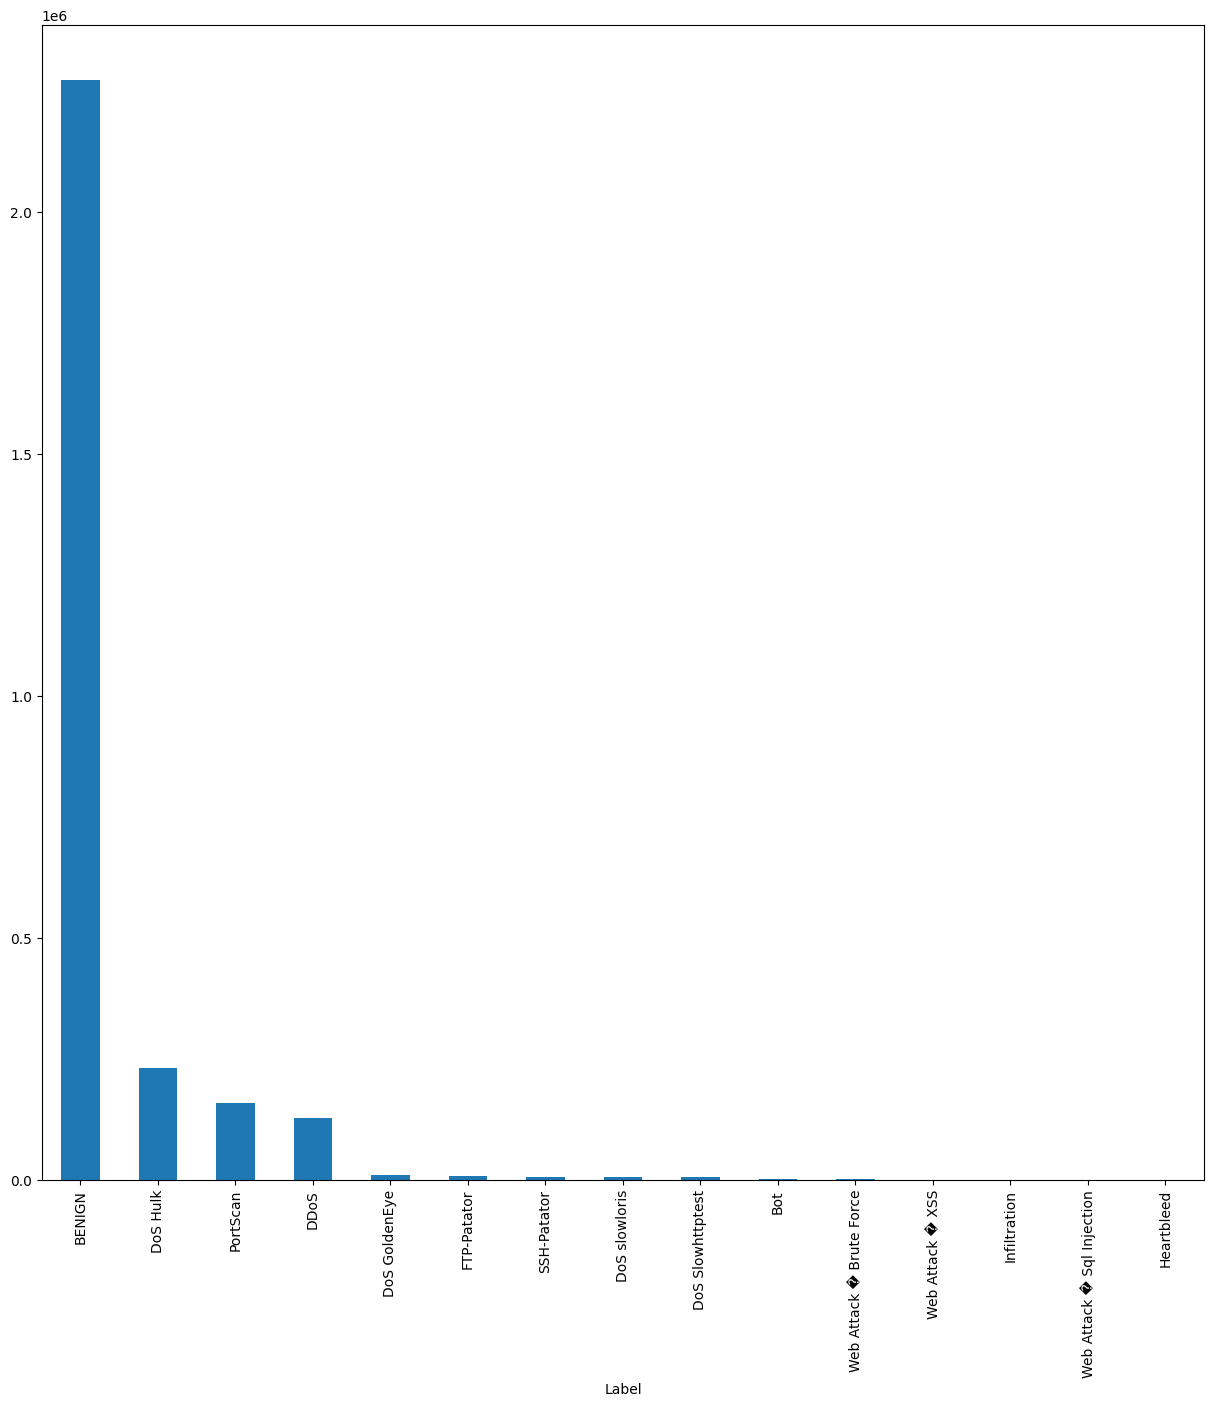

In [20]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")


/tmp/ipython-input-425537385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(a=df['Flow Duration'])


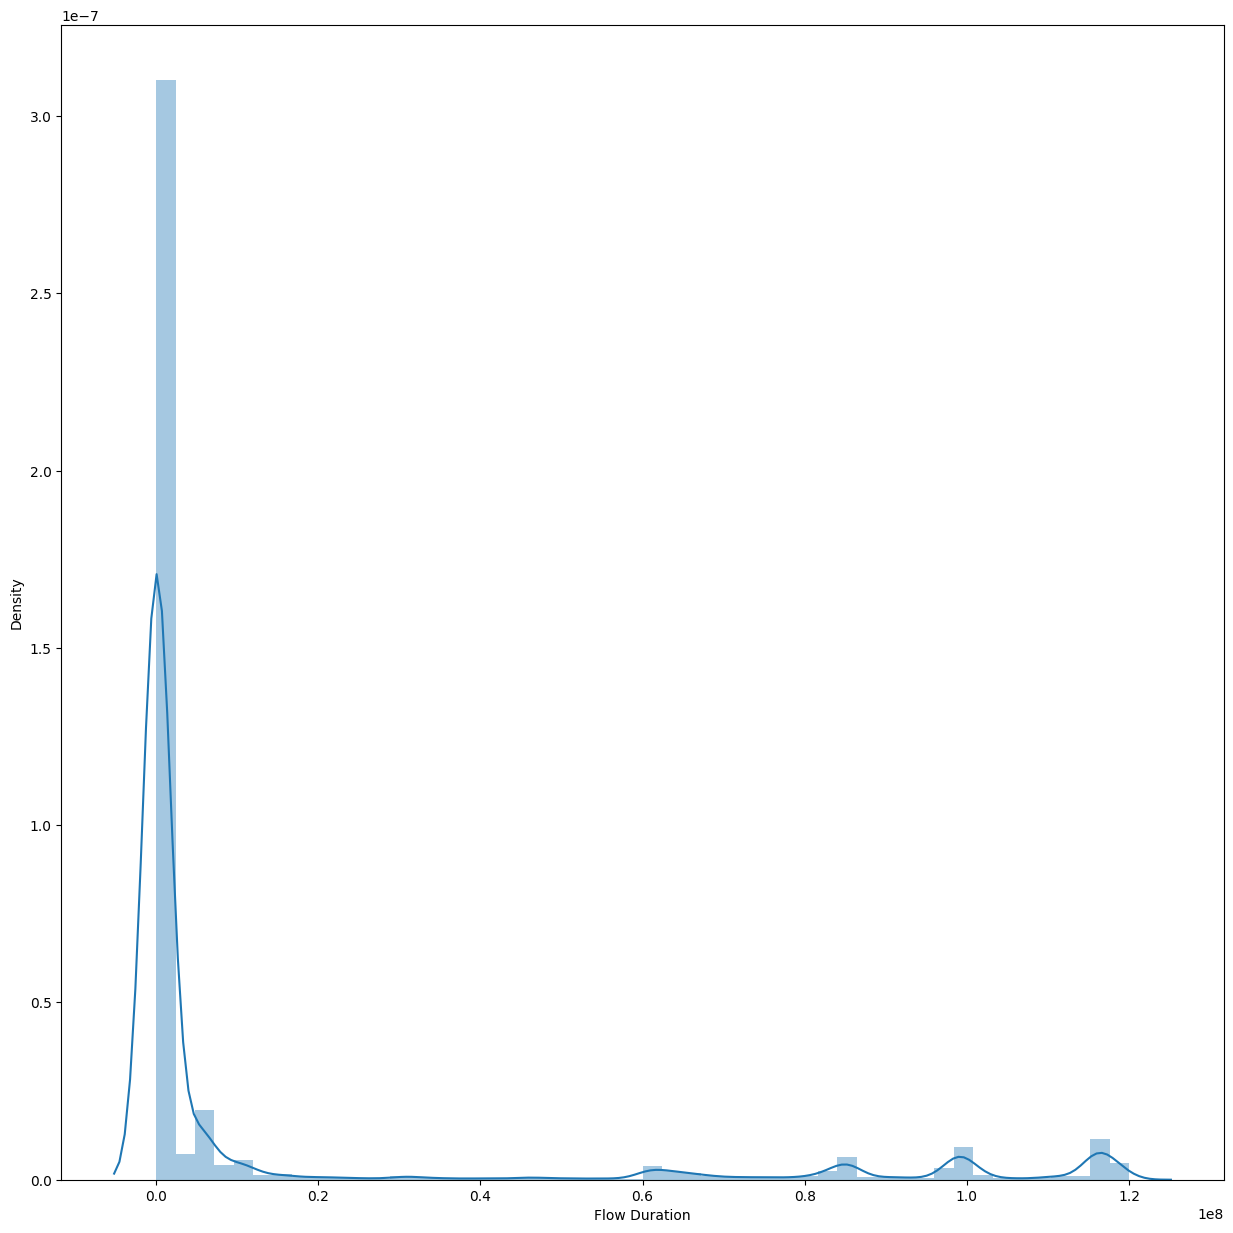

In [21]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

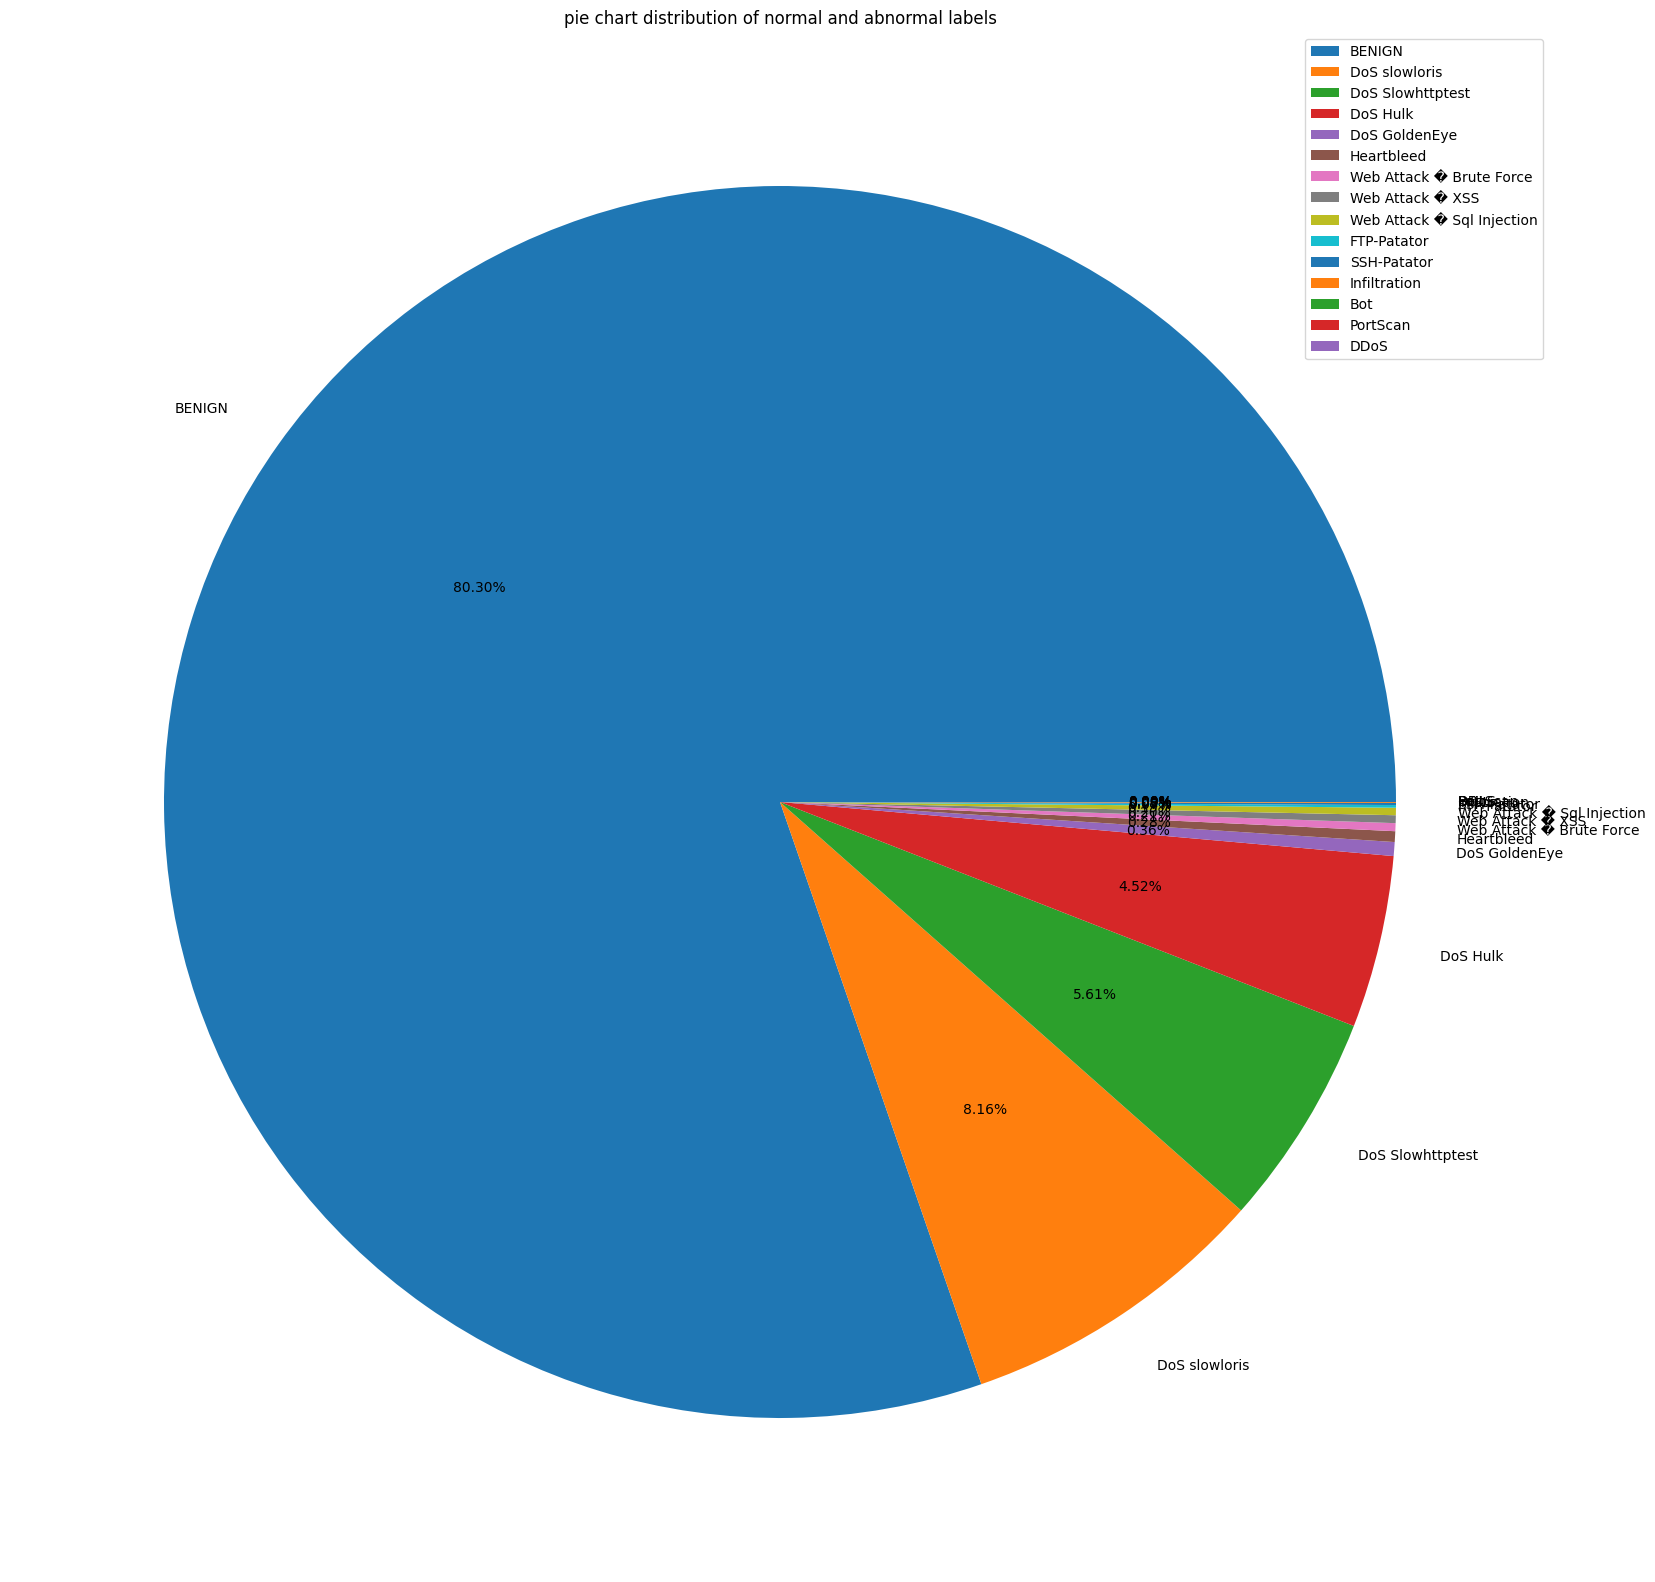

In [22]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct="%0.2f%%")
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [23]:
df.shape

(2830743, 79)

In [24]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)


Duplicate rows: 308381


In [25]:
df["Label"].value_counts()


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [26]:
import re

def clean_label(label):
    label = str(label)

    # Replace common bad encoding characters
    label = label.replace("�", "-")

    # Replace multiple spaces or hyphens with single hyphen
    label = re.sub(r"[\s\-]+", "-", label)

    # Remove leading/trailing hyphens
    label = label.strip("-")

    return label


In [27]:
df["Label"] = df["Label"].apply(clean_label)


In [28]:
df["Label"].value_counts()


,count
Label,
BENIGN,2273097
DoS-Hulk,231073
PortScan,158930
DDoS,128027
DoS-GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS-slowloris,5796
DoS-Slowhttptest,5499


In [29]:
# create binary label
df["BinaryLabel"] = (df["Label"].astype(str).str.strip() != "BENIGN").astype(int)


In [30]:
print(df["BinaryLabel"].value_counts())


BinaryLabel
0    2273097
1     557646
Name: count, dtype: int64


In [31]:
#check the sanity of data
print(df.groupby("BinaryLabel")["Label"].nunique())


BinaryLabel
0     1
1    14
Name: Label, dtype: int64


In [32]:
df["BinaryLabel"] = (
    df["Label"]
    .astype(str)
    .str.strip()
    .str.upper()
    .ne("BENIGN")
    .astype(int)
)


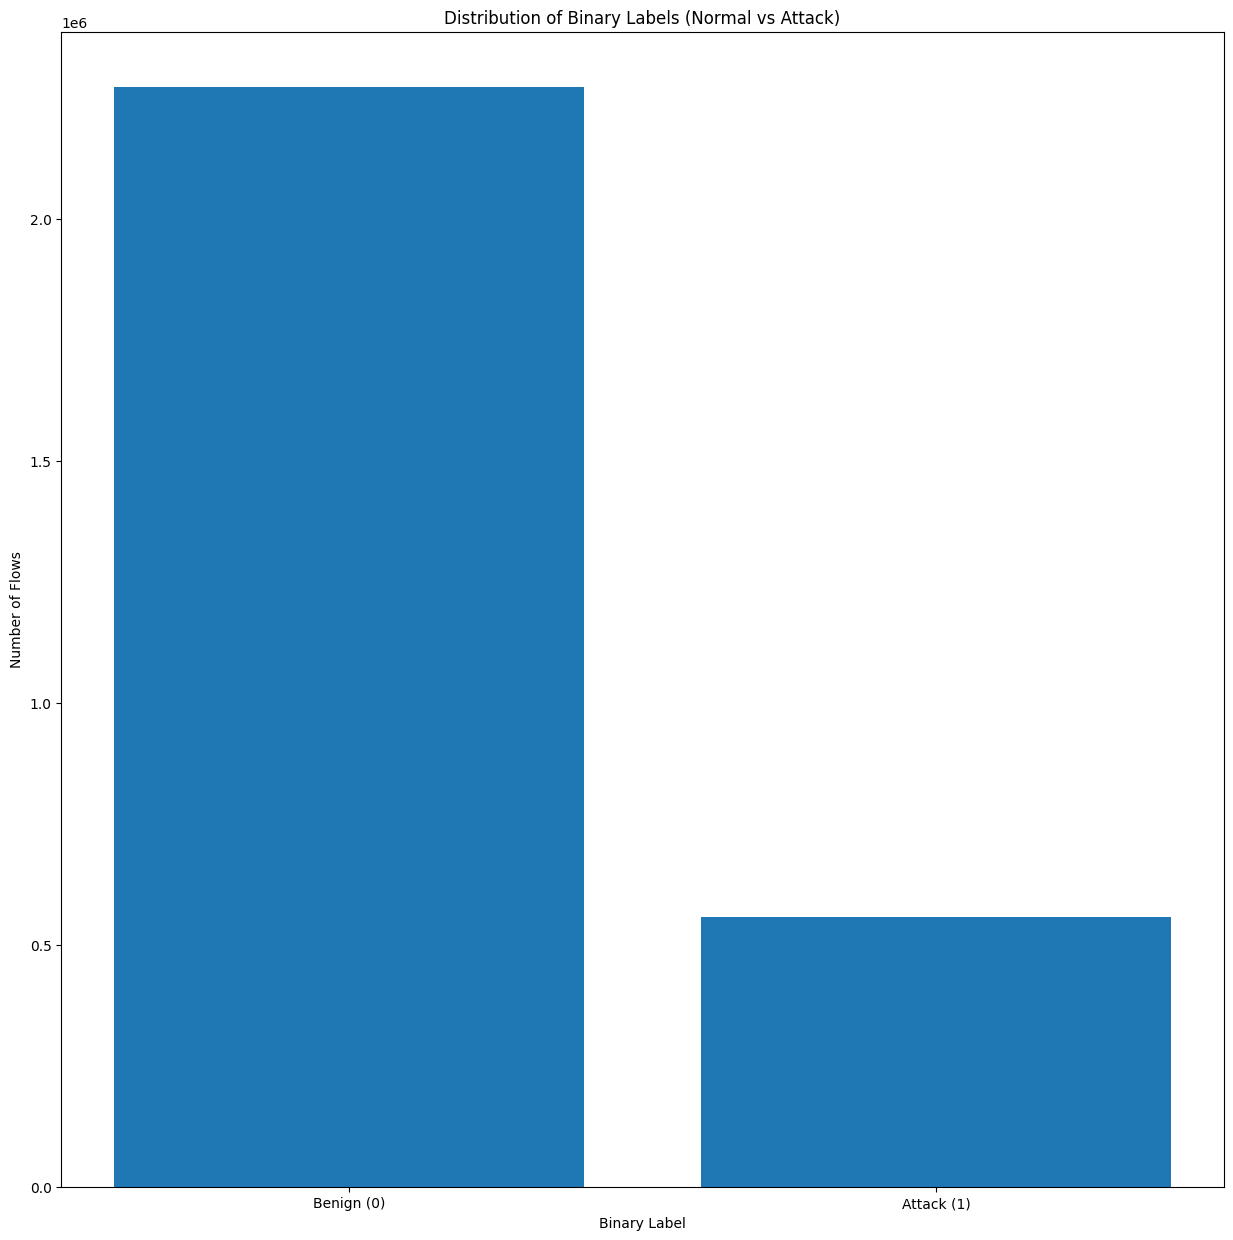

In [33]:

# Count values
label_counts = df["BinaryLabel"].value_counts().sort_index()

# Plot
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1], ["Benign (0)", "Attack (1)"])
plt.xlabel("Binary Label")
plt.ylabel("Number of Flows")
plt.title("Distribution of Binary Labels (Normal vs Attack)")
plt.show()

In [34]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [35]:
# X = features, y = target (binary)
X = df.drop(columns=["Label", "BinaryLabel"])
y = df["BinaryLabel"]

print(X.shape, y.shape)
print(y.value_counts())

(2830743, 78) (2830743,)
BinaryLabel
0    2273097
1     557646
Name: count, dtype: int64


# Split first (to avoid leakage)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #Same Benign/Attack ratio as original dataset
)


In [37]:
X_train.shape

(2264594, 78)

In [38]:
y_train.shape

(2264594,)

# Feature selection


In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# --- Take a stratified sample from training data ---
sample_n = 200_000  # try 100k if still slow
idx0 = y_train[y_train == 0].sample(n=min(sample_n//2, (y_train==0).sum()), random_state=42).index
idx1 = y_train[y_train == 1].sample(n=min(sample_n//2, (y_train==1).sum()), random_state=42).index
idx = idx0.union(idx1)

X_fs = X_train.loc[idx]
y_fs = y_train.loc[idx]

print("FS sample shape:", X_fs.shape, y_fs.shape)

# --- Faster RF for importance ---
selector_model = RandomForestClassifier(
    n_estimators=80,          # reduce for speed (importance still works)
    max_depth=18,            # limit depth for speed
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42,
    class_weight={0: 1, 1: 3}
)

selector_model.fit(X_fs, y_fs)

feat_imp = pd.Series(selector_model.feature_importances_, index=X_fs.columns).sort_values(ascending=False)

TOP_K = 20
top_features = feat_imp.head(TOP_K).index.tolist()

print("Top features selected:", len(top_features))
print(feat_imp.head(20))


FS sample shape: (200000, 78) (200000,)
Top features selected: 20
Init_Win_bytes_forward     0.089057
Destination Port           0.078549
Fwd Packet Length Mean     0.056983
Min Packet Length          0.050055
Max Packet Length          0.048862
Init_Win_bytes_backward    0.048254
Bwd Packet Length Min      0.047004
Average Packet Size        0.042250
Packet Length Std          0.036408
Subflow Fwd Bytes          0.029057
Packet Length Variance     0.027091
Avg Bwd Segment Size       0.025248
Avg Fwd Segment Size       0.024757
Bwd Packet Length Max      0.022732
Fwd Packet Length Max      0.021765
Fwd Header Length.1        0.021198
Bwd Packet Length Std      0.021162
Fwd Packet Length Min      0.020621
Fwd Header Length          0.019268
Bwd Header Length          0.018823
dtype: float64


# Freeze and save these 20 features

In [40]:
# sort feature by importance
from joblib import dump

top_features = [
    "Init_Win_bytes_forward","Destination Port","Max Packet Length","Average Packet Size",
    "Min Packet Length","Bwd Packet Length Min","Init_Win_bytes_backward","Avg Bwd Segment Size",
    "Fwd Packet Length Mean","Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Mean",
    "Fwd Packet Length Max","Fwd Packet Length Min","Packet Length Variance","Packet Length Mean",
    "Bwd Packet Length Std","Avg Fwd Segment Size","URG Flag Count","Fwd Header Length"
]





# save the top 20 features

In [41]:
from joblib import dump
import os

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

dump(top_features, os.path.join(MODEL_DIR, "most_imp20_features.joblib"))
print("Saved top20_features.joblib")


Saved top20_features.joblib


# load the top 20 features

In [42]:
# from joblib import load
# import os


# PROJECT_DIR = r"C:\Users\USER\Desktop\ANIDSSS"
# MODEL_DIR = os.path.join(PROJECT_DIR, "models")

# os.makedirs(MODEL_DIR, exist_ok=True)
# MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"

# top_features = load(os.path.join(MODEL_DIR, "top20_features.joblib"))

# print("Top features loaded:", len(top_features))
# print(top_features)

In [43]:
import matplotlib.pyplot as plt

top20_imp = feat_imp.loc[top_features].sort_values(ascending=True)


In [44]:
top20_imp.info()


<class 'pandas.core.series.Series'>
Index: 20 entries, Packet Length Mean to Init_Win_bytes_forward
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


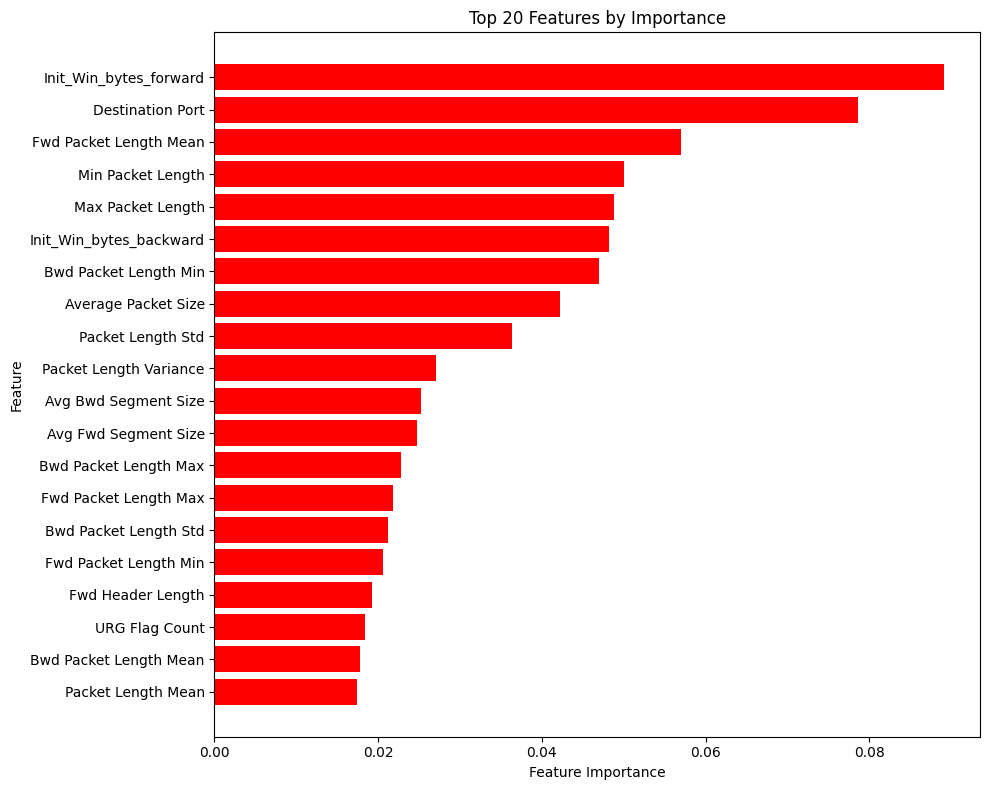

In [45]:
plt.figure(figsize=(10, 8))
plt.barh(top20_imp.index, top20_imp.values, color="red")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Features by Importance")
plt.tight_layout()
plt.show()


# apply selecte features to train and test

In [46]:
## top_features must be the same list you saved (length 20)

In [47]:
X_train_final = X_train[top_features].copy()
X_test_final  = X_test[top_features].copy()

print(X_train_final.shape, X_test_final.shape)


(2264594, 20) (566149, 20)


In [48]:
X_train_final.shape
X_test_final.shape

(566149, 20)

# scalinng of the data

In [55]:
# from sklearn.preprocessing import StandardScaler
# from joblib import dump

# scaler = StandardScaler()
# X_train_final = scaler.fit_transform(X_train_sel)
# X_test_final  = scaler.transform(X_test_sel)

# dump(scaler, os.path.join(MODEL_DIR, "scaler.joblib"))


In [56]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [57]:
from sklearn import metrics
import numpy as np

def print_all_accuracy_metric(model, name, X_train, X_test, y_train, y_test, threshold=0.5):
    print(f"\n===== {name} =====\n")

    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob  = model.predict_proba(X_test)[:, 1]

    # Apply threshold
    y_train_pred = (y_train_prob >= threshold).astype(int)
    y_test_pred  = (y_test_prob >= threshold).astype(int)

    # Confusion matrix (sklearn order)
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()

    # Rearranged matrix (YOUR diagram order)
    custom_cm = np.array([
        [tp, fn],
        [fp, tn]
    ])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    print("Confusion Matrix (TP FN / FP TN):")
    print(custom_cm)
    print(f"False Positive Rate (FPR): {fpr:.6f}\n")

    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    print(f"Precision (Attack): {precision:.4f}")
    print(f"Recall (Attack):    {recall:.4f}")
    print(f"F1-score (Attack):  {f1:.4f}\n")

    print("Accuracy (Train): {:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    print("Accuracy (Test):  {:.4f}".format(metrics.accuracy_score(y_test, y_test_pred)))

    print("\nClassification Report:")
    print(metrics.classification_report(y_test, y_test_pred))



# Machine learninng
 ## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import joblib
clfd = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

clfd.fit(X_train, y_train)

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(clfd, os.path.join(MODEL_DIR, "DecisionTreeClassifier.joblib"))

['C:\\Users\\USER\\Desktop\\ANIDS\\models\\DecisionTreeClassifier.joblib']

In [ ]:
print_all_accuracy_metric(
    model=clfd,
    name="DecisionTreeClassifier",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85   # higher threshold to reduce FP
)



===== DecisionTreeClassifier =====

Confusion Matrix (TP FN / FP TN):
[[ 80490  31039]
 [  2871 416426]]
False Positive Rate (FPR): 0.006847

Precision (Attack): 0.9656
Recall (Attack):    0.7217
F1-score (Attack):  0.8260

Accuracy (Train): 0.9361
Accuracy (Test):  0.9361

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    419297
           1       0.97      0.72      0.83    111529

    accuracy                           0.94    530826
   macro avg       0.95      0.86      0.89    530826
weighted avg       0.94      0.94      0.93    530826




## Random Forest


In [58]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=22,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 3},
    random_state=42,
    n_jobs=-1
)

# ✅ Train on 20 features
rf_clf.fit(X_train_final, y_train)

print("Model trained with features:", rf_clf.n_features_in_)  # must print 20


MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(rf_clf, os.path.join(MODEL_DIR, "randomforest_stage1_with_20_features.joblib"))

Model trained with features: 20


['C:\\Users\\USER\\Desktop\\ANIDSSS\\models/randomforest_stage1_with_20_features.joblib']

In [59]:
print_all_accuracy_metric(
    model=rf_clf,
    name="RandomForest (Stage1: BENIGN vs ATTACK)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.25  # start here; tune after seeing prob stats
)



===== RandomForest (Stage1: BENIGN vs ATTACK) =====

Confusion Matrix (TP FN / FP TN):
[[111505     24]
 [  1906 452714]]
False Positive Rate (FPR): 0.004193

Precision (Attack): 0.9832
Recall (Attack):    0.9998
F1-score (Attack):  0.9914

Accuracy (Train): 0.9967
Accuracy (Test):  0.9966

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.98      1.00      0.99    111529

    accuracy                           1.00    566149
   macro avg       0.99      1.00      0.99    566149
weighted avg       1.00      1.00      1.00    566149



# KNN



In [ ]:
# MODEL_DIR = r"C:\Users\USER\Desktop\ANIDS\models"

# # save model with clear naming
# joblib.dump( knn_clf,os.path.join(MODEL_DIR, "knn_stage1_normal_vs_attack.joblib"))

In [ ]:
import os
import joblib
from sklearn.naive_bayes import GaussianNB

# Stage-1: Normal vs Attack (0=Normal, 1=Attack)
nb_clf = GaussianNB()

# Train (use your already-scaled matrices)
nb_clf.fit(X_train_final, y_train)

# Evaluate using your existing function
print_all_accuracy_metric(
    model=nb_clf,
    name="GaussianNB (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85
)

# Save model
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"


joblib.dump(nb_clf, os.path.join(MODEL_DIR, "gaussianNB.joblib"))



===== GaussianNB (Stage-1: Normal vs Attack) =====

Confusion Matrix (TP FN / FP TN):
[[106295   5234]
 [108190 311107]]
False Positive Rate (FPR): 0.258027

Precision (Attack): 0.4956
Recall (Attack):    0.9531
F1-score (Attack):  0.6521

Accuracy (Train): 0.7867
Accuracy (Test):  0.7863

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85    419297
           1       0.50      0.95      0.65    111529

    accuracy                           0.79    530826
   macro avg       0.74      0.85      0.75    530826
weighted avg       0.88      0.79      0.81    530826



['C:\\Users\\USER\\Desktop\\ANIDS\\models\\gaussianNB.joblib']

In [60]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
import joblib
import os
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=False
)

# Train (use the same final feature matrix you use for other models)
catboost_model.fit(X_train_final, y_train)

# Evaluate using your existing function (start with 0.5; tune later on validation)
print_all_accuracy_metric(
    model=catboost_model,
    name="CatBoost (Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.5
)

# Save model
MODEL_DIR = r"C:\\Users\\USER\\Desktop\\ANIDSSS\\models"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(catboost_model, os.path.join(MODEL_DIR, "catboost_stage1.joblib"))



===== CatBoost ( Normal vs Attack) =====

Confusion Matrix (TP FN / FP TN):
[[110617    912]
 [   350 418947]]
False Positive Rate (FPR): 0.000835

Precision (Attack): 0.9968
Recall (Attack):    0.9918
F1-score (Attack):  0.9943

Accuracy (Train): 0.9977
Accuracy (Test):  0.9976

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419297
           1       1.00      0.99      0.99    111529

    accuracy                           1.00    530826
   macro avg       1.00      1.00      1.00    530826
weighted avg       1.00      1.00      1.00    530826



['C:\\Users\\USER\\Desktop\\ANIDS\\models\\catboost.joblib']

In [ ]:
import os
import joblib
from sklearn.linear_model import LogisticRegression

# Stage-1: Normal vs Attack (0=Normal, 1=Attack)
logreg_model = LogisticRegression(
    max_iter=2000,         # avoids convergence warnings
    class_weight="balanced",  # helps if attacks are fewer than normal
    random_state=42,
    n_jobs=-1
)

# Train (use your final scaled features)
logreg_model.fit(X_train_final, y_train)

# Evaluate using your existing function
print_all_accuracy_metric(
    model=logreg_model,
    name="LogisticRegression (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85
)

# Save model
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDS\models"


joblib.dump(
    logreg_model,
    os.path.join(MODEL_DIR, "logreg_stage1_normal_vs_attack.joblib")
)



===== LogisticRegression (Stage-1: Normal vs Attack) =====

Confusion Matrix (TP FN / FP TN):
[[ 74481  37048]
 [ 15198 404099]]
False Positive Rate (FPR): 0.036246

Precision (Attack): 0.8305
Recall (Attack):    0.6678
F1-score (Attack):  0.7403

Accuracy (Train): 0.9020
Accuracy (Test):  0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    419297
           1       0.83      0.67      0.74    111529

    accuracy                           0.90    530826
   macro avg       0.87      0.82      0.84    530826
weighted avg       0.90      0.90      0.90    530826



['C:\\Users\\USER\\Desktop\\ANIDS\\models\\logreg_stage1_normal_vs_attack.joblib']

# ExtratTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import joblib
import os

et_stage1 = ExtraTreesClassifier(
    n_estimators=600,          # strong ensemble
    max_depth=24,              # controls overfitting
    min_samples_leaf=2,        # stable leaves
    max_features="sqrt",       # randomness
    class_weight={0: 1, 1: 3}, # handle imbalance
    random_state=42,
    n_jobs=-1
)

et_stage1.fit(X_train_final, y_train)

# Evaluate
print_all_accuracy_metric(
    model=et_stage1,
    name="ExtraTrees (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85
)

# Save model
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(et_stage1, os.path.join(MODEL_DIR, "extratrees_stage1.joblib"))



===== ExtraTrees (Stage-1: Normal vs Attack) =====

Confusion Matrix (TP FN / FP TN):
[[ 94867  16662]
 [   308 454312]]
False Positive Rate (FPR): 0.000677

Precision (Attack): 0.9968
Recall (Attack):    0.8506
F1-score (Attack):  0.9179

Accuracy (Train): 0.9702
Accuracy (Test):  0.9700

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    454620
           1       1.00      0.85      0.92    111529

    accuracy                           0.97    566149
   macro avg       0.98      0.92      0.95    566149
weighted avg       0.97      0.97      0.97    566149



['C:\\Users\\USER\\Desktop\\ANIDSSS\\models\\extratrees_stage1.joblib']

# Map to group attack types

In [52]:
def map_attack_group(label: str) -> str:
    label = str(label).strip()

    if label == "BENIGN":
        return "BENIGN"

    # DoS family
    if label in ["DoS-Hulk", "DoS-GoldenEye", "DoS-slowloris", "DoS-Slowhttptest"]:
        return "DoS"

    # DDoS
    if label == "DDoS":
        return "DDoS"

    # PortScan
    if label == "PortScan":
        return "PortScan"

    # Brute Force
    if label in ["FTP-Patator", "SSH-Patator"]:
        return "BruteForce"

    # Web attacks
    if label in ["Web-Attack-Brute-Force", "Web-Attack-XSS", "Web-Attack-Sql-Injection"]:
        return "WebAttack"

    # Bot
    if label == "Bot":
        return "Bot"

    # Rare classes
    if label in ["Heartbleed", "Infiltration"]:
        return "OtherAttack"

    return "OtherAttack"


# STAGE-2 DATA = ONLY ATTACK FLOWS (exclude BENIGN)

In [53]:
df["Label_raw"] = df["Label"].astype(str).str.strip()
df["AttackGroup"] = df["Label_raw"].apply(map_attack_group)

# Stage-1 binary label (helper)
df["Stage1Label"] = (df["AttackGroup"] != "BENIGN").astype(int)

print(df["AttackGroup"].value_counts())



AttackGroup
BENIGN         2273097
DoS             252661
PortScan        158930
DDoS            128027
BruteForce       13835
WebAttack         2180
Bot               1966
OtherAttack         47
Name: count, dtype: int64


# Build Stage-2 dataset (attacks only)

In [54]:
df_attack = df[df["AttackGroup"] != "BENIGN"].copy()

X2 = df_attack[top_features].copy()
y2 = df_attack["AttackGroup"].copy()

print(X2.shape)
print(y2.value_counts())


(557646, 20)
AttackGroup
DoS            252661
PortScan       158930
DDoS           128027
BruteForce      13835
WebAttack        2180
Bot              1966
OtherAttack        47
Name: count, dtype: int64


In [55]:

df["Label"].value_counts()

,count
Label,
BENIGN,2273097
DoS-Hulk,231073
PortScan,158930
DDoS,128027
DoS-GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS-slowloris,5796
DoS-Slowhttptest,5499


In [62]:

df_stage2 = df[df["AttackGroup"] != "BENIGN"].copy()

# Encode y2

In [57]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y2_enc = le2.fit_transform(y2)


array([3, 3, 3, ..., 2, 2, 2])

In [61]:
import joblib
import os

MODEL_DIR = r"C:\\Users\\USER\\Desktop\\ANIDSSS\\models"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(le2, os.path.join(MODEL_DIR, "label_encoder_stage2_top20_feature.joblib"))
print("Saved label_encoder_stage2_top20.joblib")


Saved label_encoder_stage2_top20.joblib


# Train test split

In [59]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2_enc, test_size=0.2, random_state=42, stratify=y2_enc
)


In [63]:
from catboost import CatBoostClassifier

In [66]:
from catboost import CatBoostClassifier

stage2_model = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1",
    auto_class_weights="Balanced",
    iterations=1200,
    depth=6,
    learning_rate=0.06,
    random_seed=42,
    verbose=200,
    od_type="Iter",
    od_wait=200
)

stage2_model.fit(
    X2_train, y2_train,
    eval_set=(X2_test, y2_test),
    use_best_model=True
)
joblib.dump(stage2_model, os.path.join(MODEL_DIR, "stage2_catboost.joblib"))

0:	learn: 0.8382475	test: 0.8652201	best: 0.8652201 (0)	total: 511ms	remaining: 10m 12s
200:	learn: 0.9996020	test: 0.9996179	best: 0.9996179 (200)	total: 1m 51s	remaining: 9m 15s
400:	learn: 0.9996789	test: 0.9997092	best: 0.9997120 (389)	total: 3m 24s	remaining: 6m 46s
600:	learn: 0.9996901	test: 0.9997148	best: 0.9997148 (583)	total: 4m 49s	remaining: 4m 48s
800:	learn: 0.9997141	test: 0.9997290	best: 0.9997290 (680)	total: 6m 19s	remaining: 3m 8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9997290256
bestIteration = 680

Shrink model to first 681 iterations.


['C:\\\\Users\\\\USER\\\\Desktop\\\\ANIDSSS\\\\models/stage2_catboost.joblib']

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# predict class index (0..K-1)
pred_enc = stage2_model.predict(X2_test).astype(int).reshape(-1)

# decode to class names
y_true = le2.inverse_transform(y2_test)
y_pred = le2.inverse_transform(pred_enc)

# accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# confusion matrix with fixed label order
labels = list(le2.classes_)
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Labels order:", labels)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.9993723661795033

Classification Report:
               precision    recall  f1-score   support

         Bot       1.00      1.00      1.00       393
  BruteForce       1.00      1.00      1.00      2767
        DDoS       1.00      1.00      1.00     25606
         DoS       1.00      1.00      1.00     50533
 OtherAttack       1.00      1.00      1.00         9
    PortScan       1.00      1.00      1.00     31786
   WebAttack       0.90      1.00      0.94       436

    accuracy                           1.00    111530
   macro avg       0.98      1.00      0.99    111530
weighted avg       1.00      1.00      1.00    111530

Labels order: ['Bot', 'BruteForce', 'DDoS', 'DoS', 'OtherAttack', 'PortScan', 'WebAttack']

Confusion Matrix:
 [[  393     0     0     0     0     0     0]
 [    0  2767     0     0     0     0     0]
 [    0     0 25602     4     0     0     0]
 [    0     0     6 50503     0     0    24]
 [    0     0     0     0     9     0     0]
 [    0     0

In [68]:
import pandas as pd

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


             Bot  BruteForce   DDoS    DoS  OtherAttack  PortScan  WebAttack
Bot          393           0      0      0            0         0          0
BruteForce     0        2767      0      0            0         0          0
DDoS           0           0  25602      4            0         0          0
DoS            0           0      6  50503            0         0         24
OtherAttack    0           0      0      0            9         0          0
PortScan       0           0      0      9            0     31750         27
WebAttack      0           0      0      0            0         0        436


# stacking ensemble

In [67]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

base_estimators = [
    ("rf", RandomForestClassifier(
        n_estimators=400,
        max_depth=26,
        min_samples_leaf=2,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )),
    ("et", ExtraTreesClassifier(
        n_estimators=700,
        max_depth=28,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )),
    ("cb", CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.08,
        loss_function="MultiClass",
        random_seed=42,
        verbose=False
    ))
]

meta = LogisticRegression(
    max_iter=6000,
    n_jobs=-1,
    class_weight="balanced"
)

stage2_stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta,
    stack_method="predict_proba",
    cv=3,
    n_jobs=-1,
    passthrough=False
)

stage2_stack.fit(X2_train, y2_train)



ModuleNotFoundError: No module named 'catboost'

In [ ]:
import joblib
import os

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save Stage-2 stacking model
joblib.dump(stage2_stack, os.path.join(MODEL_DIR, "stage2_stack.joblib"))

print("Saved Stage-2 stacking model successfully!")


Saved Stage-2 stacking model successfully!


## random mix data



In [ ]:
# Save a mixed sample (balanced-ish)
df_mixed_test = (
    pd.concat([
        df[df["Label"]=="BENIGN"].sample(5000, random_state=42),
        df[df["Label"]!="BENIGN"].sample(5000, random_state=42)
    ])
    .sample(frac=1, random_state=42)
)

df_mixed_test.to_csv("mixed_test_full_labels.csv", index=False)
print("Saved mixed_test_full_labels.csv", df_mixed_test.shape)


Saved mixed_test_full_labels.csv (10000, 81)


In [ ]:
X_test.head(10).to_csv("test_first_X_10.csv", index=False)
y_test.head(10).to_csv("test_first_y_10.csv", index=False)


## last 10 row


In [ ]:
X_test.tail(10).to_csv("test_last_X_10.csv", index=False)
y_test.tail(10).to_csv("test_last_y_10.csv", index=False)


## middle 10 row


In [ ]:
mid_start = len(X_test) // 2 - 5
mid_end = mid_start + 10

X_test.iloc[mid_start:mid_end].to_csv("test_middle_X_10.csv", index=False)
y_test.iloc[mid_start:mid_end].to_csv("test_middle_y_10.csv", index=False)


## random 10 data

In [ ]:
X_random_20 = X_test.sample(n=20, random_state=42)
y_random_20 = y_test.loc[X_random_20.index]

X_random_20.to_csv("test_random_X_20.csv", index=False)
y_random_20.to_csv("test_random_y_20.csv", index=False)
